# **Summarization**

## Use case

[Summarization Document](https://python.langchain.com/docs/use_cases/summarization)

Suppose you have a set of documents (PDFs, Notion pages, customer questions, etc.) and you want to summarize the content.

LLMs are a great tool for this given their proficiency in understanding and synthesizing text.

In this walkthrough we'll go over how to perform document summarization using LLMs.


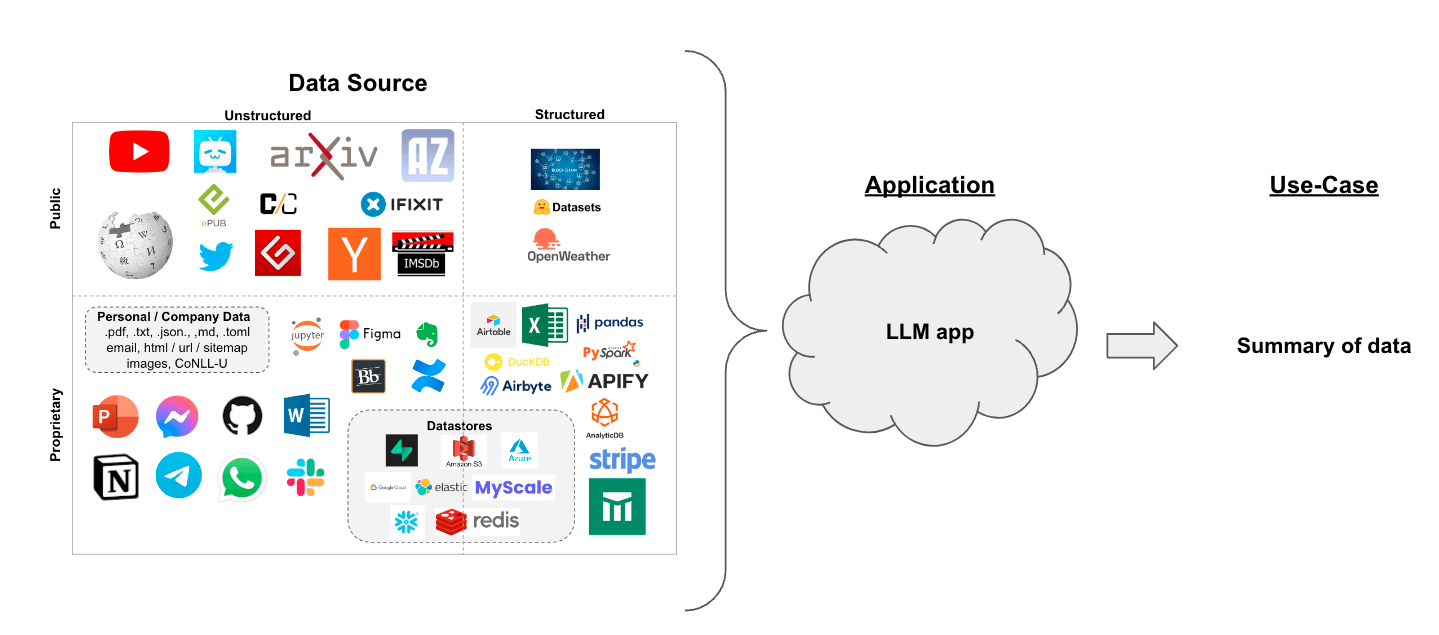

In [1]:
!pip install -qU langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 305.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.3 MB/s eta 0:00:00


In [2]:
!pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 1.2 MB/s eta 0:00:00


In [3]:
#!pip install -qU langchain

In [4]:
!pip install -qU pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.5 MB/s eta 0:00:00


In [5]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY']=userdata.get('openai_key')

### Reading and Preparing The Text

In [7]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from langchain_community.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)
    pdf_documents=file_loader.load()
    return pdf_documents

In [9]:
pdf=read_doc('/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf')
len(pdf)

/usr/local/lib/python3.10/dist-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


15

In [10]:
pdf[0] #first page

Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also c

In [11]:
pdf[0:5] # first five page

[Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also 

## **3 types of Summarize Chains**

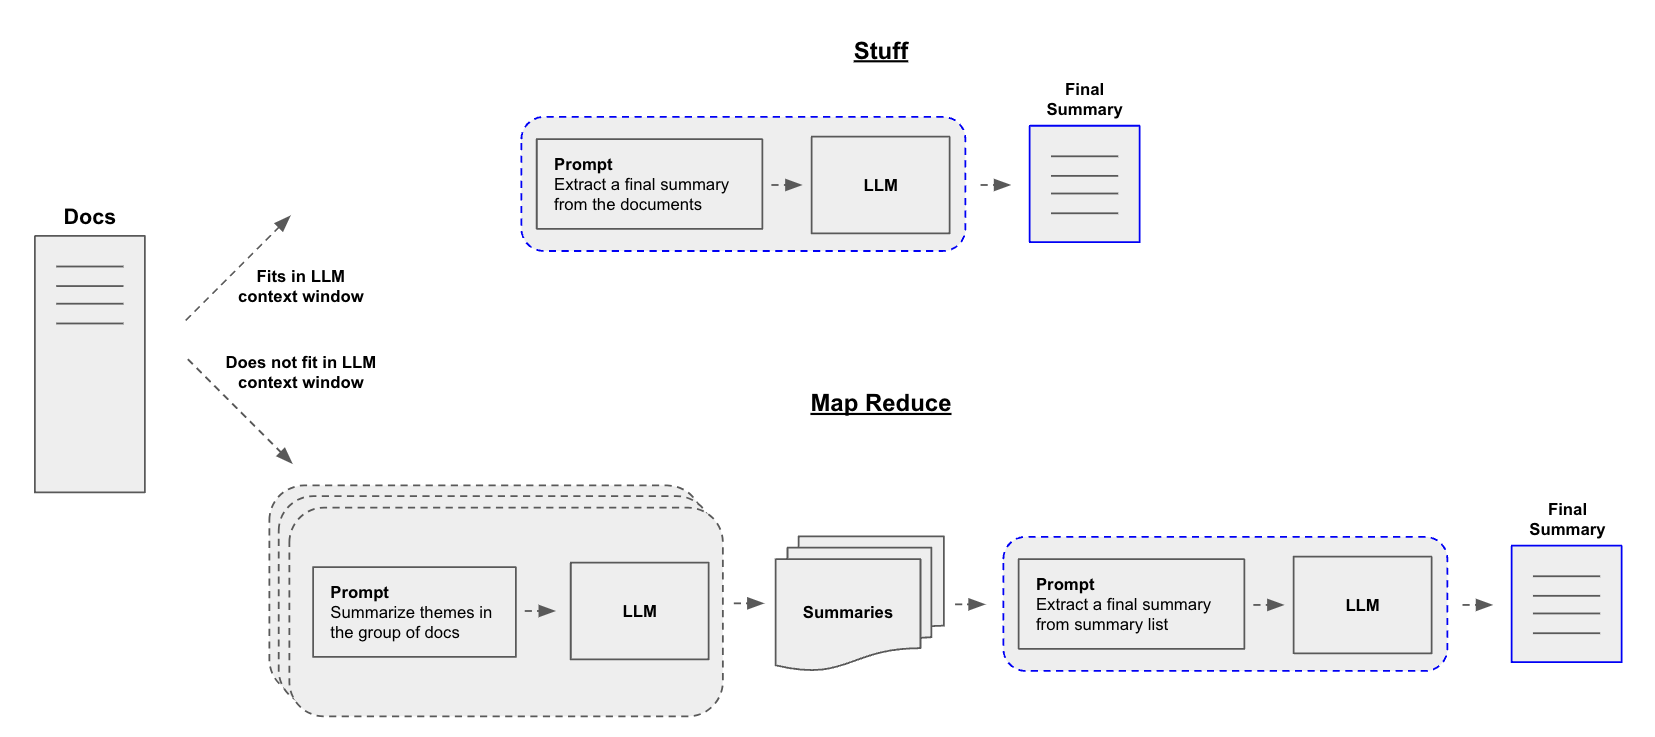

### **1. Summarizing with the 'stuff' Chain**

Stuffing is the simplest method, whereby you simply stuff all the related data into the prompt as context to pass to the language model. This is implemented in LangChain as the StuffDocumentsChain.

Pros: Only makes a single call to the LLM. When generating text, the LLM has access to all the data at once.

Cons: Most LLMs have a context length, and for large documents (or many documents) this will not work as it will result in a prompt larger than the context length.

The main downside of this method is that it only works one smaller pieces of data. Once you are working with many pieces of data, this approach is no longer feasible. The next two approaches are designed to help deal with that.*

In [12]:
from langchain_openai import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain

llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

In [18]:
chain = load_summarize_chain(
    llm,
    chain_type='stuff'
)
output_summary = chain.invoke(pdf[0:5])['output_text']

In [14]:
chain = load_summarize_chain(
    llm,
    chain_type='stuff'
)
output_summary = chain.invoke(pdf)['output_text']

In [ ]:
from IPython.display import Markdown
Markdown(output_summary)

The paper "Attention Is All You Need" introduces the Transformer, a novel neural network architecture that relies entirely on attention mechanisms, eliminating the need for recurrent or convolutional layers. This design allows for greater parallelization and significantly faster training times. The Transformer achieves state-of-the-art results in machine translation tasks, outperforming previous models with a BLEU score of 28.4 for English-to-German and 41.8 for English-to-French translations. The architecture consists of stacked self-attention and feed-forward layers in both the encoder and decoder, enabling the model to capture global dependencies in the data. The authors demonstrate the Transformer's versatility by applying it successfully to other tasks, such as English constituency parsing.

In [15]:
from IPython.display import Markdown
Markdown(output_summary)

The paper "Attention Is All You Need" introduces the Transformer, a novel neural network architecture that relies entirely on attention mechanisms, eliminating the need for recurrent or convolutional layers. This architecture significantly enhances parallelization and reduces training time while achieving state-of-the-art results in machine translation tasks. The Transformer model outperforms existing models on the WMT 2014 English-to-German and English-to-French translation tasks, achieving BLEU scores of 28.4 and 41.8, respectively, with reduced training costs. The authors demonstrate the model's versatility by successfully applying it to English constituency parsing. The paper highlights the advantages of self-attention in capturing long-range dependencies and improving computational efficiency, paving the way for future research in various domains beyond text.

In [16]:
chain

StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7921161f01f0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921161f1b10>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), document_variable_name='text')

In [17]:
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [21]:
chain.llm_chain.prompt.template="""Write a summary in 1000 tokens of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

In [22]:
chain

StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a summary in 1000 tokens of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7921161f01f0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921161f1b10>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), document_variable_name='text')

In [23]:
llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

chain = load_summarize_chain(
    llm,
    chain_type='stuff',
    #prompt=prompt
)
output_summary = chain.invoke(pdf[0:5])['output_text']
output_summary

'The paper "Attention Is All You Need" introduces the Transformer, a novel neural network architecture that relies entirely on attention mechanisms, eliminating the need for recurrent or convolutional layers. This approach addresses the limitations of traditional sequence transduction models, which typically use complex recurrent neural networks (RNNs) or convolutional neural networks (CNNs) that hinder parallelization and are computationally intensive.\n\nThe Transformer architecture consists of an encoder-decoder structure, where the encoder processes input sequences and the decoder generates output sequences. Each encoder and decoder is composed of multiple identical layers that utilize multi-head self-attention and feed-forward networks. The self-attention mechanism allows the model to weigh the importance of different input elements, enabling it to capture long-range dependencies effectively.\n\nKey innovations include the use of scaled dot-product attention, which computes attent

In [24]:
Markdown(output_summary)

The paper "Attention Is All You Need" introduces the Transformer, a novel neural network architecture that relies entirely on attention mechanisms, eliminating the need for recurrent or convolutional layers. This approach addresses the limitations of traditional sequence transduction models, which typically use complex recurrent neural networks (RNNs) or convolutional neural networks (CNNs) that hinder parallelization and are computationally intensive.

The Transformer architecture consists of an encoder-decoder structure, where the encoder processes input sequences and the decoder generates output sequences. Each encoder and decoder is composed of multiple identical layers that utilize multi-head self-attention and feed-forward networks. The self-attention mechanism allows the model to weigh the importance of different input elements, enabling it to capture long-range dependencies effectively.

Key innovations include the use of scaled dot-product attention, which computes attention scores efficiently, and multi-head attention, which allows the model to focus on different parts of the input simultaneously. The architecture also incorporates residual connections and layer normalization to enhance training stability and performance.

Experiments demonstrate that the Transformer outperforms existing models in machine translation tasks, achieving state-of-the-art BLEU scores of 28.4 for English-to-German and 41.8 for English-to-French translations, while requiring significantly less training time. The model's ability to generalize to other tasks, such as English constituency parsing, further underscores its versatility.

Overall, the Transformer represents a significant advancement in sequence modeling, offering improved efficiency and performance through its innovative use of attention mechanisms.

In [25]:
chain.llm_chain.prompt.template="""Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

### **2. Summarizing with the 'Map Reduce' Chain**
This method involves **an initial prompt on each chunk of data ***
( for summarization tasks, this could be a summary of that chunk; for question-answering tasks, it could be an answer based solely on that chunk). **Then a different prompt is run to combine all the initial outputs.** This is implemented in the LangChain as the MapReduceDocumentsChain.

**Pros:** Can scale to larger documents (and more documents) than StuffDocumentsChain. The calls to the LLM on individual documents are independent and can therefore be parallelized.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. Loses some information during the final combining call.

In [26]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

llm = ChatOpenAI(temperature=0,
                 model_name='gpt-4o-mini',
                 max_tokens=1024)

In [27]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)#10000 characters = 1 page
chunks = text_splitter.split_documents(pdf)

In [28]:
len(chunks)

15

In [29]:
chunks[0]

Document(metadata={'source': '/content/drive/MyDrive/GENAI-LLM/Langchain/attention is all you need.pdf', 'page': 0}, page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also c

In [30]:
%%time
chain = load_summarize_chain(llm,
                             chain_type="map_reduce")


output_summary = chain.invoke(chunks)["output_text"]
Markdown(output_summary)

CPU times: user 1.3 s, sys: 189 ms, total: 1.49 s
Wall time: 34.4 s


The paper "Attention Is All You Need" presents the Transformer, a groundbreaking neural network architecture that relies entirely on attention mechanisms, eliminating the need for recurrent and convolutional layers. This model achieves state-of-the-art performance in machine translation, with BLEU scores of 28.4 for English-to-German and 41.8 for English-to-French, while also being more efficient in training time. The Transformer features an encoder-decoder structure with stacked self-attention and feed-forward layers, utilizing multi-head attention to capture diverse data relationships. It employs sinusoidal positional encodings to incorporate sequence information and demonstrates strong adaptability in tasks like English constituency parsing. The authors highlight the Transformer's efficiency and effectiveness, encouraging future applications of attention-based models across various domains.

In [31]:
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('********

In [32]:
# for summarizing each part/chunk
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [33]:
# for combining the parts
chain.combine_document_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

### **Map Reduce With Custom Prompts**

In [34]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce'
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('********

In [35]:
# prompt for every chunk
from langchain import PromptTemplate

chunks_prompt="""
Please summarize the below text:
text:'{text}'
summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                   template=chunks_prompt)

In [36]:
# prompt for combined summaries
final_combine_prompt="""
Provide a final summary of the entire text with important points.
Add a Generic  Title,
Start the precise summary with an introduction and provide the
summary in number points for the text.
text: '{text}'
summary:
"""
final_combine_prompt_template=PromptTemplate(input_variables=['text'],
                                             template=final_combine_prompt)

In [37]:
chain = load_summarize_chain(
                            llm=llm,
                            chain_type='map_reduce',
                            map_prompt=map_prompt_template,
                            combine_prompt=final_combine_prompt_template
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nPlease summarize the below text:\ntext:'{text}'\nsummary:\n"), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nProvide a final summary of the entire text with important points.\nAdd a Generic  Title,\nStart the precise summary with an introduction and provide the\nsummary in number points for the text.\ntext: '{text}'\nsummary:\n"), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.comp

In [38]:
output_summary = chain.invoke(chunks)["output_text"]
output_summary

'**Title: Overview of the Transformer Model and Its Impact on Machine Translation**\n\nThe text provides a comprehensive overview of the Transformer model, a groundbreaking architecture in the field of machine learning, particularly for natural language processing tasks. It highlights the model\'s efficiency, performance, and versatility, marking a significant advancement over traditional recurrent and convolutional networks. Below are the key points summarized from the text:\n\n1. **Introduction to the Transformer**: The Transformer model, introduced in the paper "Attention Is All You Need," relies solely on attention mechanisms, eliminating the need for recurrent or convolutional networks.\n\n2. **Performance in Machine Translation**: The Transformer achieves state-of-the-art results in machine translation, with BLEU scores of 28.4 for English-to-German and 41.8 for English-to-French, while also being more efficient in training time.\n\n3. **Model Architecture**: The architecture con

In [39]:
from IPython.display import Markdown

Markdown(output_summary)

**Title: Overview of the Transformer Model and Its Impact on Machine Translation**

The text provides a comprehensive overview of the Transformer model, a groundbreaking architecture in the field of machine learning, particularly for natural language processing tasks. It highlights the model's efficiency, performance, and versatility, marking a significant advancement over traditional recurrent and convolutional networks. Below are the key points summarized from the text:

1. **Introduction to the Transformer**: The Transformer model, introduced in the paper "Attention Is All You Need," relies solely on attention mechanisms, eliminating the need for recurrent or convolutional networks.

2. **Performance in Machine Translation**: The Transformer achieves state-of-the-art results in machine translation, with BLEU scores of 28.4 for English-to-German and 41.8 for English-to-French, while also being more efficient in training time.

3. **Model Architecture**: The architecture consists of an encoder-decoder structure, with both components featuring stacked self-attention and fully connected layers, allowing for significant parallelization.

4. **Attention Mechanisms**: The text discusses two key attention mechanisms:
   - **Scaled Dot-Product Attention**: Efficiently computes attention using dot products of queries and keys.
   - **Multi-Head Attention**: Enhances the model's ability to capture diverse information by processing multiple attention heads in parallel.

5. **Positional Encoding**: To incorporate positional information, sinusoidal positional encodings are added to input embeddings, enabling the model to learn relative positions effectively.

6. **Computational Efficiency**: The Transformer model demonstrates superior computational efficiency compared to recurrent and convolutional layers, allowing for better handling of long-range dependencies.

7. **Training Process**: The training utilized datasets from WMT 2014, employing techniques like dropout and label smoothing to enhance performance, and was conducted on NVIDIA P100 GPUs.

8. **Performance Comparison**: The Transformer outperforms previous models in translation tasks, achieving higher BLEU scores at a significantly lower training cost.

9. **Variations and Applications**: The text discusses variations of the Transformer architecture and its applications in tasks like English constituency parsing, where it also achieved competitive results.

10. **Future Directions**: The authors express enthusiasm for the potential applications of attention-based models beyond text, including in images, audio, and video, aiming to improve efficiency in handling large inputs and outputs.

11. **References**: The text includes a list of academic references that highlight significant advancements in machine learning, particularly in neural networks and natural language processing.

Overall, the Transformer model represents a significant leap forward in machine translation and natural language processing, showcasing the power of attention mechanisms in achieving high performance and efficiency.

### With the 'refine' CombineDocument Chain

### **2. Summarizing with the 'Refine' Chain**

This method involves **an initial prompt on the first chunk of data, generating some output. For the remaining documents, that output is passed in, along with the next document**, asking the LLM to refine the output based on the new document.

**Pros:** Can pull in more relevant context, and may be less lossy than MapReduceDocumentsChain.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. The calls are also NOT independent, meaning they cannot be paralleled like MapReduceDocumentsChain. There is also some potential dependencies on the ordering of the documents.

In [40]:
chain = load_summarize_chain(llm,
                             chain_type="refine")

output_summary = chain.invoke(chunks)["output_text"]

In [41]:
chain

RefineDocumentsChain(initial_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x792115f85b70>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7921160fd840>, model_name='gpt-4o-mini', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), refine_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['existing_answer', 'text'], template="Your job is to produce a final summary.\nWe have provided an existing summary up to a certain point: {existing_answer}\nWe have the opportunity to refine the existing summary (only if needed) with some more context below.\n------------\n{text}\n------------\nGiven the new context, refine the original summary.\nIf the context isn't useful, return the original summary."), llm=ChatOpenAI(client=<openai.

In [42]:
Markdown(output_summary)

The paper "Attention Is All You Need" introduces the Transformer, a novel neural network architecture that relies solely on attention mechanisms, eliminating the need for recurrent and convolutional layers. This approach demonstrates superior performance in machine translation tasks, achieving a BLEU score of 28.4 for English-to-German and 41.8 for English-to-French, significantly surpassing previous models while being more efficient in training time. The authors, affiliated with Google Brain and Google Research, highlight the Transformer's versatility by successfully applying it to English constituency parsing. The work represents a collaborative effort, with equal contributions from multiple researchers.

The Transformer architecture consists of stacked self-attention and point-wise, fully connected layers for both the encoder and decoder. The encoder is composed of six identical layers, each featuring a multi-head self-attention mechanism and a position-wise feed-forward network, with residual connections and layer normalization applied. The decoder also has six identical layers, incorporating an additional multi-head attention sub-layer that attends to the encoder's output, while ensuring that predictions for each position depend only on known outputs from previous positions.

A key innovation in the Transformer is the use of Scaled Dot-Product Attention, where the input consists of queries, keys, and values. The attention weights are computed by taking the dot products of the queries with the keys, scaling them by the square root of their dimension, and applying a softmax function. This allows for efficient computation of attention across multiple queries simultaneously. Additionally, the architecture employs Multi-Head Attention, which projects the queries, keys, and values into multiple learned linear projections, enabling the model to capture diverse relationships in the data. Specifically, the model uses eight parallel attention heads, each with reduced dimensionality, allowing for efficient computation while maintaining the overall computational cost similar to that of single-head attention.

The Transformer utilizes multi-head attention in three distinct ways: in encoder-decoder attention layers, where the decoder queries attend to the encoder's output; in self-attention layers within the encoder, allowing each position to attend to all previous positions; and in self-attention layers within the decoder, which are masked to prevent leftward information flow, preserving the auto-regressive property.

In addition to attention sub-layers, each layer in the encoder and decoder contains a position-wise feed-forward network, consisting of two linear transformations with a ReLU activation in between. The model also employs learned embeddings to convert input and output tokens into vectors, sharing weight matrices between the embedding layers and the pre-softmax linear transformation.

To account for the lack of recurrence and convolution, the Transformer incorporates positional encodings to inject information about the order of tokens in the sequence. These encodings, based on sine and cosine functions of varying frequencies, allow the model to learn relative positions effectively and can generalize to longer sequences than those seen during training.

The architecture allows for significant parallelization in training, addressing the limitations of sequential computation found in traditional recurrent models, and utilizes self-attention to model dependencies without regard to their distance in the input or output sequences. This innovation positions the Transformer as a leading model in sequence transduction tasks, demonstrating lower computational complexity and shorter path lengths for learning long-range dependencies compared to recurrent and convolutional layers.

Furthermore, the authors discuss potential improvements for handling very long sequences by restricting self-attention to a local neighborhood, which could enhance computational performance. They also highlight the interpretability of self-attention mechanisms, noting that individual attention heads learn distinct tasks and exhibit behavior related to the syntactic and semantic structure of sentences. For instance, attention visualizations reveal how certain heads can effectively track long-distance dependencies, such as the relationship between the verb "making" and its distant context in a sentence. The training regime involved using large datasets, efficient batching, and the Adam optimizer with a carefully scheduled learning rate, ensuring robust performance across various tasks.

The results indicate that the Transformer outperforms previous state-of-the-art models on the WMT 2014 English-to-German and English-to-French translation tasks, achieving BLEU scores of 28.4 and 41.8, respectively, while requiring significantly less training cost. The base model surpasses all previously published models and ensembles, demonstrating the efficiency and effectiveness of the Transformer architecture in machine translation.

Additionally, the paper explores variations of the Transformer architecture, analyzing the impact of different configurations on performance metrics such as perplexity and BLEU scores. The authors find that while increasing model size generally improves performance, careful tuning of parameters like dropout rates is crucial to avoid overfitting. They also investigate the application of the Transformer to English constituency parsing, where it achieves competitive results, outperforming many previous models, particularly in semi-supervised settings. This further validates its versatility across different natural language processing tasks.

In conclusion, the Transformer represents a significant advancement in sequence transduction models, achieving state-of-the-art results in translation tasks and demonstrating strong performance in parsing tasks without task-specific tuning. The authors express excitement about the future of attention-based models and plan to extend the Transformer to other modalities beyond text, as well as to explore local attention mechanisms for